In [1]:
# !pip install yfinance # uncomment these to install missing packages if they are not already installed
# !pip install pandas 

import yfinance as yf
import pandas as pd

def get_price(tick,start='2021-10-01',end=None):
    return yf.Ticker(tick).history(start=start,end=end)['Close']

def get_prices(tickers,start='2021-10-01',end=None):
    df=pd.DataFrame()
    for s in tickers:
        df[s]=get_price(s,start,end)
    return df

In [215]:
feature_stocks=['tsla','fb','twtr','amzn','nflx','gbtc','gdx','intc','dal','c', 'aapl', 'goog']
predict_stock='msft'

# dates have been changed to make data sizes multiple of 4

# training set
start_date_train='2021-08-30'
end_date_train='2021-11-30'

# validation set
start_date_val='2021-12-01'
end_date_val='2022-01-05'

# test set
start_date_test='2022-01-06'
end_date_test='2022-01-31'

X_train_df=get_prices(feature_stocks,start=start_date_train,end=end_date_train)
y_train_df=get_prices([predict_stock],start=start_date_train,end=end_date_train)

X_val_df=get_prices(feature_stocks,start=start_date_val,end=end_date_val)
y_val_df=get_prices([predict_stock],start=start_date_val,end=end_date_val)

X_test_df=get_prices(feature_stocks,start=start_date_test,end=end_date_test)
y_test_df=get_prices([predict_stock],start=start_date_test,end=end_date_test)


In [213]:
X_train_df

,tsla,fb,twtr,amzn,nflx,gbtc,gdx,intc,dal,c,aapl,goog
Date,,,,,,,,,,,,
2021-08-30,730.909973,380.660004,64.699997,3421.570068,566.179993,38.900002,31.617125,53.163036,39.910000,70.598251,152.702301,2909.389893
2021-08-31,735.719971,379.380005,64.500000,3470.790039,569.190002,37.770000,32.039734,53.281311,40.439999,70.834671,151.415817,2909.239990
2021-09-01,734.090027,382.049988,65.550003,3479.000000,582.070007,38.240002,31.823519,52.896931,40.400002,70.243637,152.093964,2916.840088
2021-09-02,732.390015,375.279999,64.599998,3463.120117,588.549988,39.070000,31.941456,52.956066,40.820000,70.430801,153.230850,2884.379883
2021-09-03,733.570007,376.260010,64.660004,3478.050049,590.530029,40.730000,32.708050,52.739235,40.250000,70.105728,153.879089,2895.500000
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-22,1156.869995,341.010010,47.310001,3572.570068,659.200012,45.150002,32.432861,49.453285,39.770000,66.516090,160.815109,2941.570068
2021-11-23,1109.030029,337.250000,47.139999,3580.040039,654.059998,46.880001,31.941456,48.728798,39.529999,67.538040,161.204620,2935.139893
2021-11-24,1116.000000,341.059998,47.520000,3580.409912,658.289978,46.419998,31.862829,49.383808,39.689999,66.754211,161.733948,2934.350098


In [276]:
y_train_df

,msft
Date,
2021-08-30,302.410309
2021-08-31,300.706940
2021-09-01,300.657135
2021-09-02,299.979767
2021-09-03,299.969818
...,...
2021-11-22,339.128754
2021-11-23,336.983215
2021-11-24,337.212738


In [297]:
import numpy as np 
print(np.shape(X_train_df), np.shape(X_val_df) ,np.shape(X_test_df))

(64, 12) (24, 12) (16, 12)


In [360]:
# normalize the test data to range from 0 to 1

def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

X_train_norm = normalize(X_train_df)
X_val_norm = normalize(X_val_df)
X_test_norm = normalize(X_test_df)

y_train_norm = normalize(y_train_df)
y_val_norm = normalize(y_val_df)
y_test_norm = normalize(y_test_df)




In [359]:
X_train_norm

,tsla,fb,twtr,amzn,nflx,gbtc,gdx,intc,dal,c,aapl,goog
Date,,,,,,,,,,,,
2021-08-30,0.001481,0.978273,0.882463,0.457830,0.000000,0.317267,0.544240,0.745992,0.401532,0.877469,0.606866,0.699630
2021-08-31,0.011106,0.959977,0.873134,0.555049,0.023982,0.264389,0.616026,0.760789,0.459518,0.911665,0.550868,0.699200
2021-09-01,0.007844,0.998142,0.922108,0.571265,0.126604,0.286383,0.579299,0.712700,0.455142,0.826177,0.580387,0.720985
2021-09-02,0.004442,0.901372,0.877798,0.539899,0.178233,0.325222,0.599332,0.720098,0.501094,0.853249,0.629874,0.627941
2021-09-03,0.006804,0.915380,0.880597,0.569388,0.194009,0.402901,0.729549,0.692971,0.438731,0.806230,0.658091,0.659816
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-22,0.853844,0.411521,0.071362,0.756084,0.741136,0.609733,0.682805,0.281878,0.386214,0.287021,0.960004,0.791871
2021-11-23,0.758114,0.357776,0.063433,0.770838,0.700183,0.690688,0.599332,0.191240,0.359956,0.434837,0.976959,0.773440
2021-11-24,0.772061,0.412236,0.081157,0.771569,0.733886,0.669162,0.585976,0.273186,0.377461,0.321463,1.000000,0.771176


In [361]:
#Convert training and testing data into numpy array¶

X_train=np.array(X_train_norm)
y_train=np.array(y_train_norm)
X_val=np.array(X_val_norm)
y_val=np.array(y_val_norm)
X_test=np.array(X_test_norm)
y_test=np.array(y_test_norm)

In [362]:
import torch.nn.functional as F
import torch.nn as nn
import torch
from torchsummary import summary

In [381]:
train_x = torch.tensor(X_train, dtype=torch.float32) 
train_y = torch.tensor(y_train, dtype=torch.float32)
val_x = torch.tensor(X_val, dtype=torch.float32)
val_y = torch.tensor(y_val,dtype=torch.float32)
test_x = torch.tensor(X_test, dtype=torch.float32)
test_y = torch.tensor(y_test, dtype=torch.float32)
train_x.size()
# Note: torch.float32 is considered float
# torch.float64 is considered double
# by default when you create a tensor it is type float aka torch.float32

torch.Size([64, 12])

In [382]:

class UNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.max_pool = nn.MaxPool2d(kernel_size=(2,1))
        
        self.conv_in = nn.Conv2d(in_channels=12, out_channels=50, kernel_size=(1,1), padding='same')
        
        self.conv1 = nn.Conv2d(in_channels=50, out_channels=64, kernel_size=(3,1), padding='same')
        self.conv2 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=(3,1), padding='same')
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=(3,1), padding='same')
        self.conv4 = nn.Conv2d(in_channels=128, out_channels=128, kernel_size=(3,1), padding='same')
        self.conv5 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=(3,1), padding='same')
        self.conv6 = nn.Conv2d(in_channels=256, out_channels=256, kernel_size=(3,1), padding='same')
        # TODO why stride =2?
        self.convtrans1 = nn.ConvTranspose2d(in_channels=256, out_channels=128, kernel_size=(2,1) , stride=2)
        self.conv7 = nn.Conv2d(in_channels=256, out_channels=128, kernel_size=(3,1), padding='same')
        self.conv8 = nn.Conv2d(in_channels=128, out_channels=128, kernel_size=(3,1), padding='same')
        
        self.convtrans2 = nn.ConvTranspose2d(in_channels=128, out_channels=64, kernel_size=(2,1), stride=2)
        
        self.conv9 = nn.Conv2d(in_channels=128, out_channels=1, kernel_size=(1,1), padding='same')
 
    def forward(self, x):
        x0 = self.conv_in(x)
        
        x1 = self.conv1(x0)
        x1 = F.relu(x1)
        
        x2 = self.conv2(x1)
        x2 = F.relu(x2)

        x3 = self.max_pool(x2)
        
        x4 = self.conv3(x3)
        x4 = F.relu(x4)
        
        x5 = self.conv4(x4)
        x5 = F.relu(x5)
        
        x6 = self.max_pool(x5)
        
        x7 = self.conv5(x6)
        x6 = F.relu(x6)
        
        x8 = self.conv6(x7)
        x8 = F.relu(x8)
        
        x9 = self.convtrans1(x8)
        
        x10 = self.conv7(torch.cat((x5,x9), axis=1))# skip connections
        
        x11 = self.conv8(x10)
        x11 = F.relu(x11)
        
        x12 = self.convtrans2(x11)
        x13 = self.conv9(torch.cat((x2,x12), axis=1))# skip connections
        
        return x13


In [383]:
# test on random data
data = torch.rand((1, 12, 64, 1)) # number of element in the batch, channels, width, height,  (N C W H), 
#N is number of elements in batch
model = UNet()
print(model(data).size())
summary(model, (12, 64, 1),1) # last argument is batch size

#Note:  no. of channels are increasing then decreasing, height is decreasing and then increasing, width is 1 throughout
# for testing, C and W will remain the same but you can change H i.e. the number of inputs in a batch to a different number which is multiple of 4
# multiple of 4 because we are doing 2 downsamlings/halfings and 2 upsamplings/doublings
# output is of size: (number of inputs, 1) which each row being prediction for one input

torch.Size([1, 1, 64, 1])
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1             [1, 50, 64, 1]             650
            Conv2d-2             [1, 64, 64, 1]           9,664
            Conv2d-3             [1, 64, 64, 1]          12,352
         MaxPool2d-4             [1, 64, 32, 1]               0
            Conv2d-5            [1, 128, 32, 1]          24,704
            Conv2d-6            [1, 128, 32, 1]          49,280
         MaxPool2d-7            [1, 128, 16, 1]               0
            Conv2d-8            [1, 256, 16, 1]          98,560
            Conv2d-9            [1, 256, 16, 1]         196,864
  ConvTranspose2d-10            [1, 128, 32, 1]          65,664
           Conv2d-11            [1, 128, 32, 1]          98,432
           Conv2d-12            [1, 128, 32, 1]          49,280
  ConvTranspose2d-13             [1, 64, 64, 1]          16,448
           Co

### change input tensor shape for the model: 

In [384]:
train_x_t = torch.transpose(train_x, 0, 1)
val_x_t = torch.transpose(val_x, 0, 1)
test_x_t = torch.transpose(test_x, 0, 1)

print(train_x_t.size(), val_x_t.size(), test_x_t.size()) 
train_x_in = torch.unsqueeze(torch.unsqueeze(train_x_t, 0), 3) # unsqueeze adds another dimension as the specified index
val_x_in = torch.unsqueeze(torch.unsqueeze(val_x_t, 0), 3)
test_x_in = torch.unsqueeze(torch.unsqueeze(test_x_t, 0), 3)
print(train_x_in.size(), val_x_in.size(), test_x_in.size())

torch.Size([12, 64]) torch.Size([12, 24]) torch.Size([12, 16])
torch.Size([1, 12, 64, 1]) torch.Size([1, 12, 24, 1]) torch.Size([1, 12, 16, 1])


## Training

In [385]:
model = UNet()
optimizer = torch.optim.SGD(model.parameters(), lr=0.0001)
loss_func = torch.nn.MSELoss()  # this is for regression mean squared loss
EPOCH = 10000

train_losses = []
val_losses = []

for t in range(EPOCH):
  
    prediction = model(train_x_in)     # input x and predict based on x

    loss = loss_func(prediction[0][0][:], train_y)     # must be (1. nn output, 2. target)
    train_losses.append(loss.data.numpy())

    optimizer.zero_grad()   # clear gradients for next train
    loss.backward()         # backpropagation, compute gradients
    optimizer.step()        # apply gradients


    prediction_val = model(val_x_in)
    loss_val = loss_func(prediction_val[0][0][:], val_y)
    
    val_losses.append(loss_val.data.numpy())

prediction_test = model(test_x_in)
loss_test = loss_func(prediction_test[0][0][:], test_y)
    
print( 'test_ loss:', loss_test.data.numpy())

test_ loss: 0.05259454


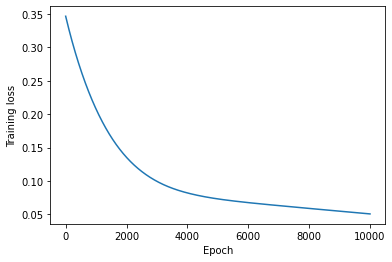

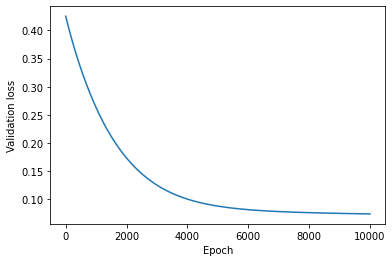

In [386]:
import matplotlib.pyplot as plt

fig = plt.figure()
plt.plot(range(EPOCH), train_losses)
#plt.plot(range(EPOCH), val_losses)
plt.xlabel('Epoch')
plt.ylabel('Training loss')
plt.show()

fig = plt.figure()
plt.plot(range(EPOCH), val_losses)
plt.xlabel('Epoch')
plt.ylabel('Validation loss')
plt.show()